### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [32]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [33]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [34]:
# Check for missing values in the data.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [35]:
# Explore the data.
print(reviews.shape)
print(reviews.columns)
print(reviews.info())

(2000, 11)
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object

In [36]:
# Descriptive statistics.
reviews.describe() 

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [37]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [38]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 
                                  'spending_score (1-100)': 'spending_score'})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [39]:
# Create a CSV file as output.
reviews.to_csv('reviews_clean.csv', index=False)

In [40]:
# Import new CSV file with Pandas.
rc = pd.read_csv('reviews_clean.csv')

# Sense check the new DataFrame.
print(rc.shape)
print(rc.info())
rc.head()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [41]:
# Define the independent variable.
X = rc['spending_score'] 

# Define the dependent variable.
y = rc['loyalty_points']  



# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        15:54:07   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [43]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -75.0527 + 33.0617 * X

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

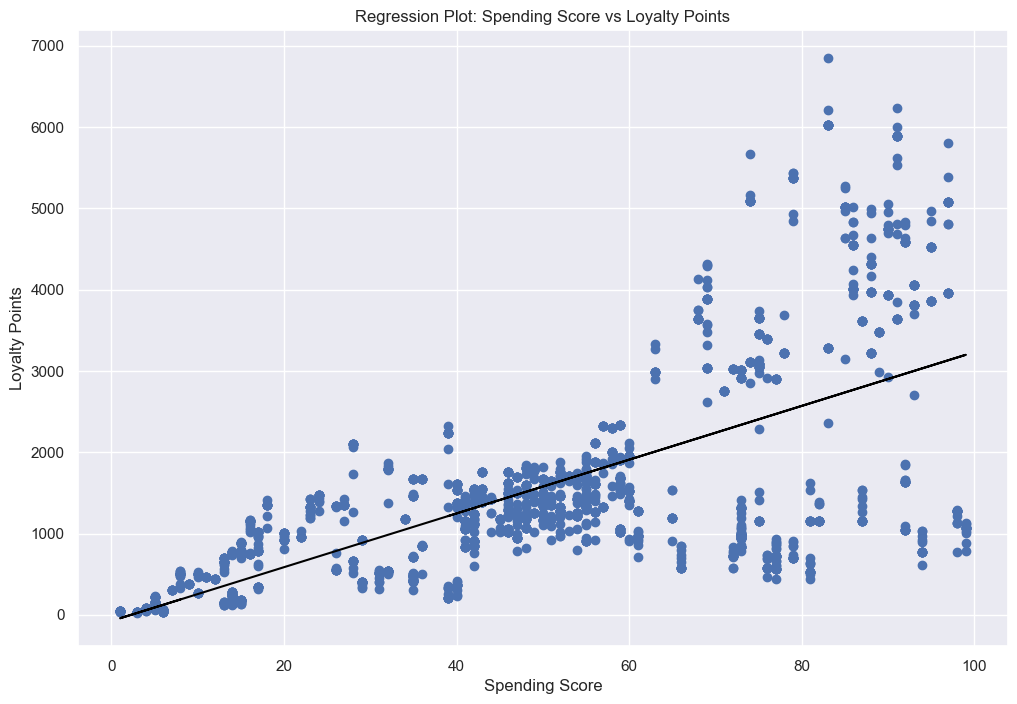

In [44]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

# Set Labels
plt.title("Regression Plot: Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

### 5b) renumeration vs loyalty

In [45]:
# Define the independent variable.
X = rc['remuneration'] 

# Define the dependent variable.
y = rc['loyalty_points']  



# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        15:54:08   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [47]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = -65.686513 + 34.187825 * X

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

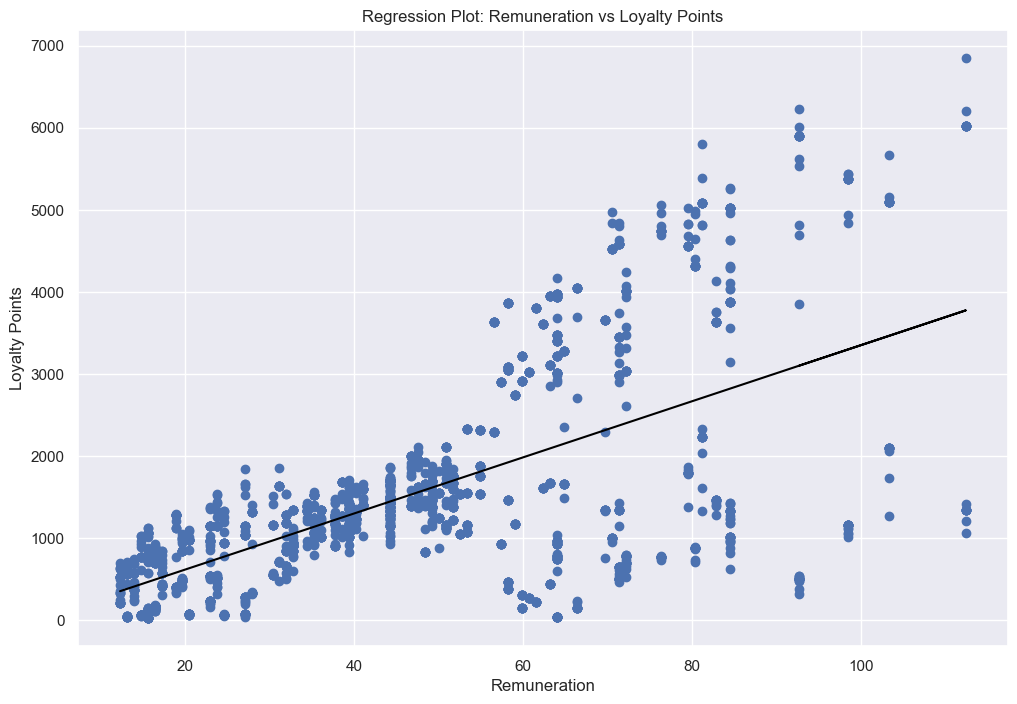

In [48]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

# Set Labels
plt.title("Regression Plot: Remuneration vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

### 5c) age vs loyalty

In [49]:
# Define the independent variable.
X = rc['age'] 

# Define the dependent variable.
y = rc['loyalty_points']  



# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Jul 2023   Prob (F-statistic):             0.0577
Time:                        15:54:09   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [51]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = 1736.517739 - 4.012805 * X

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

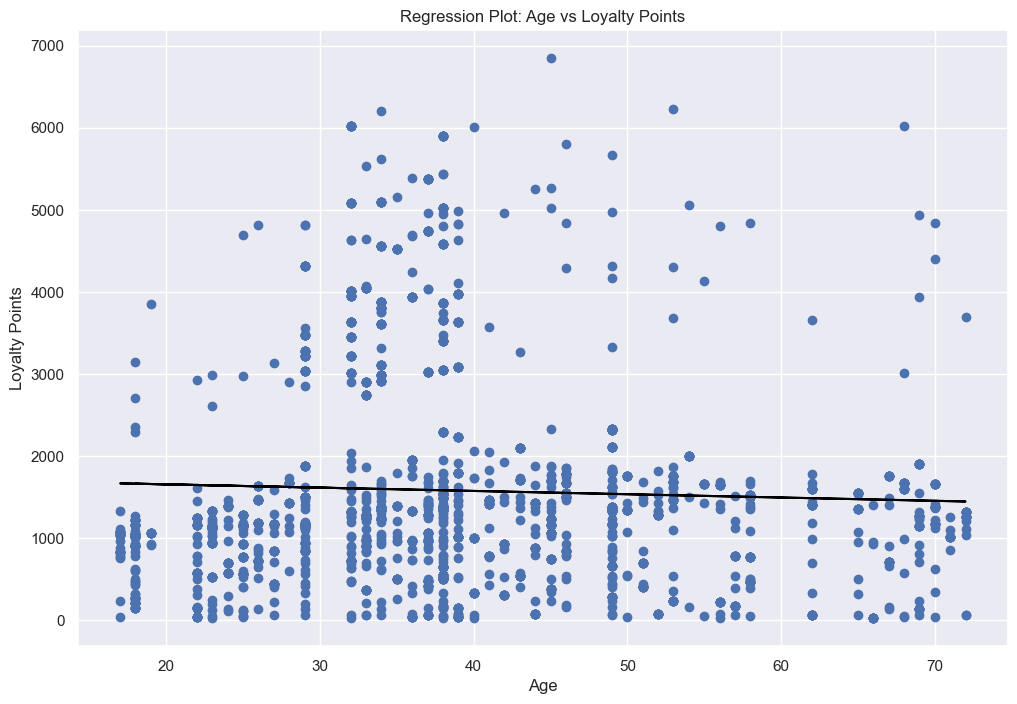

In [52]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

# Set Labels
plt.title("Regression Plot: Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [53]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [54]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_clean.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [55]:
# Drop unnecessary columns.
df2 = df2.drop(columns=['gender', 'age', 'loyalty_points',
                      'education', 'product', 'review',
                      'summary'])

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [56]:
# Explore the data.
print(df2.shape)
print(df2.info())

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [57]:
# Descriptive statistics.
print(df2.describe)

<bound method NDFrame.describe of       remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]>


## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

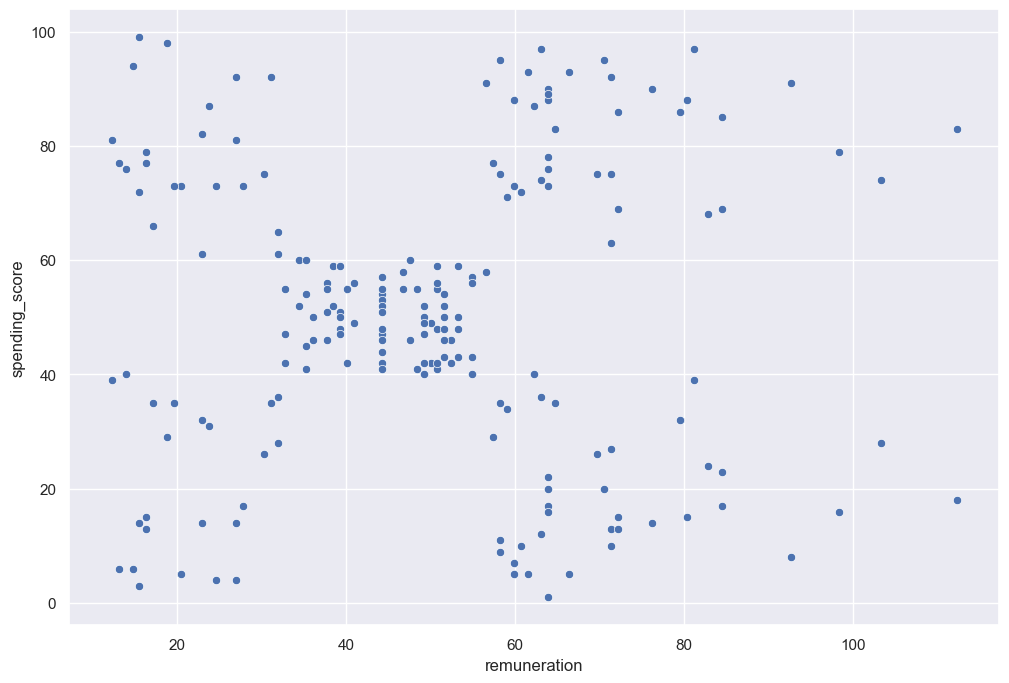

In [58]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

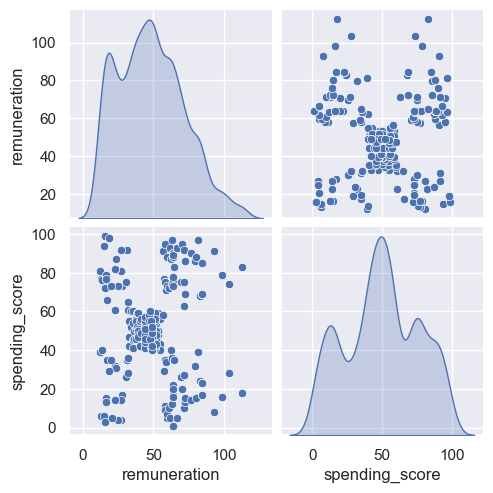

In [59]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

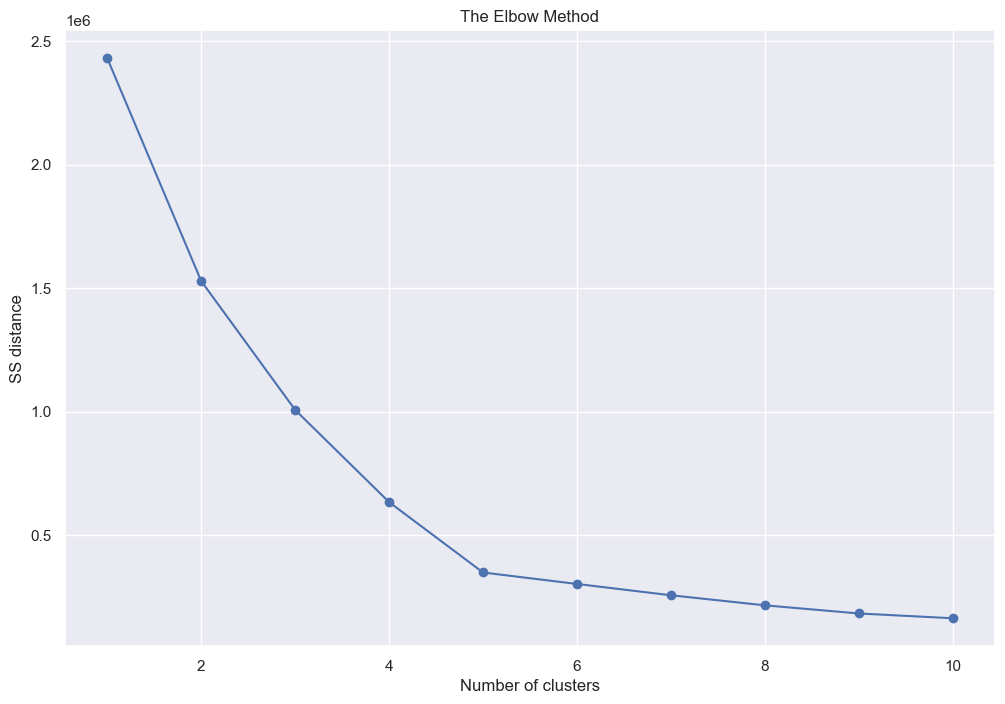

In [60]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

The point where the within-cluster-sum of squared errors (WSS) significantly starts to diminish is point 5, which is the elbow feature signifying that the optimal number of clusters for the dataset is 5. Beyond this point, adding more clusters doesn't provide substantial improvement and may lead to overfitting, so it's most effective to limit the number of clusters to 5 in this specific context.

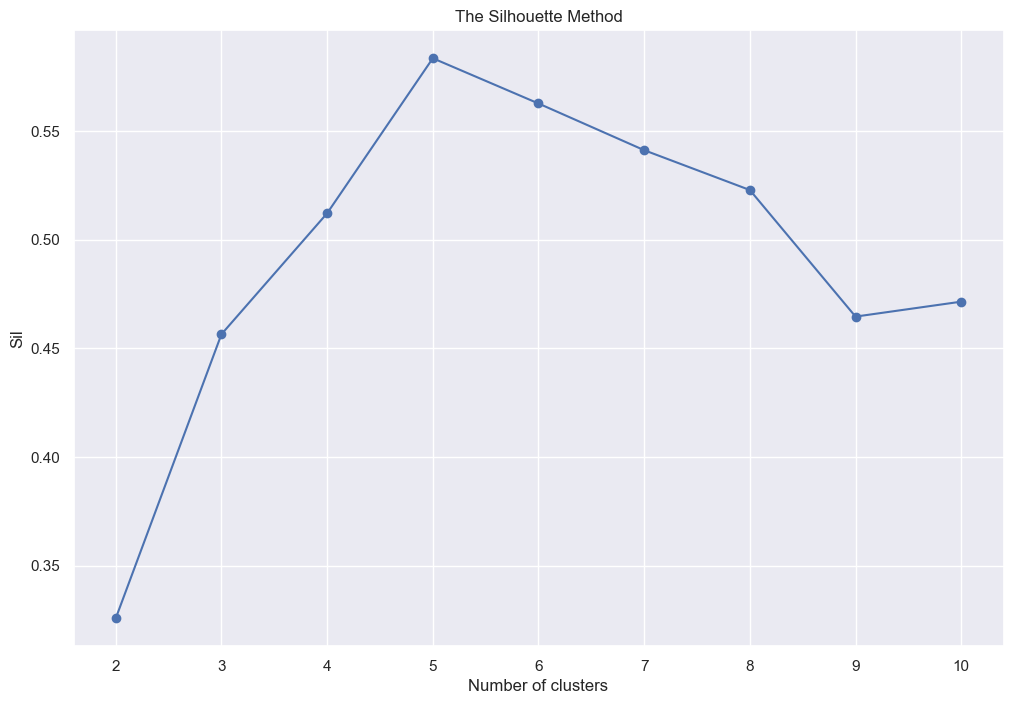

In [61]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

5 clusters has the highest average silhouette coefficient, indicating that the optimal number of clusters for the dataset is 5.

Because both the silhouette method and the elbow method indicate 5 clusters is the optimal amount of clusters for the dataset I chose to use 5 clusters for the rest of the assignment activity.


## 4. Evaluate k-means model at different values of *k*

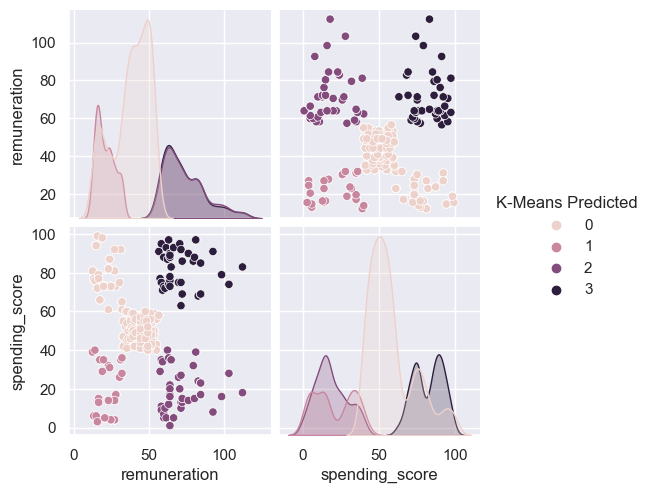

In [62]:
# Evaluate the k-means model with 4 clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [63]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

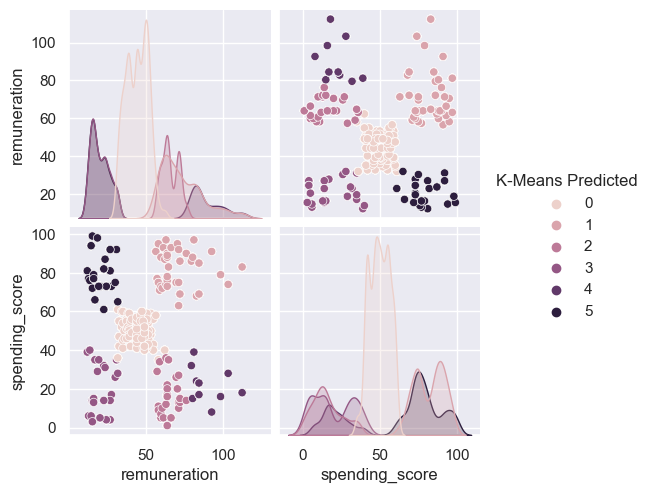

In [64]:
# Evaluate the k-means model with 6 clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [65]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

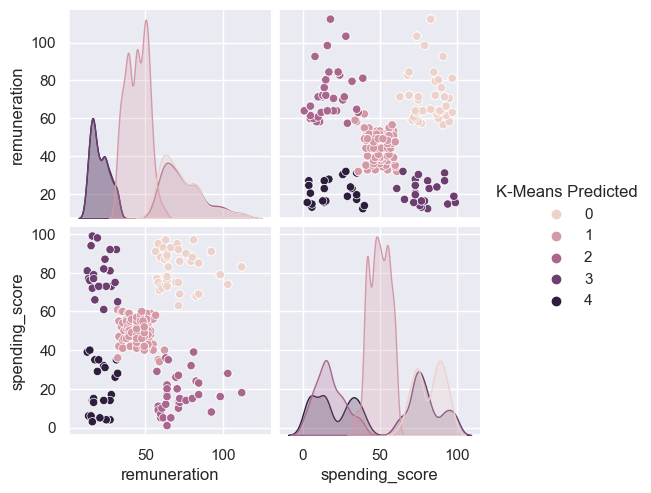

In [66]:
# Evaluate the k-means model with 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [67]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## Evaluating the usefulness of the three k values.

When using 5 clusters, the groups are clearly distinguishable by eye in the scatterplot have been correctly identified. 


Remuneration density plot:
Group 0 peaks in the middle (the people in this group have average remuneration).

Group 1 and 4 both have similar peaks on the left side of the graph (the people in these groups have a lower than average remuneration).


Group 2 and 3 both have similar peaks on the right side of the graph (the people in these groups have higher than average remuneration).


Spending score density plot:
Group 0 peaks in the middle (this groups spending score is average compared to other groups).

Group 1 and 2 both have peak on the left side of the graph (the people in these groups have a lower than average spending scores).

Group 3 and 4 both peak on the right side of the graph (the people in these groups have higher than average spending scores).


The 5 easily distinguishable groups 
(0) average income/average spend
(1) low income/low spend
(2) high income/low spend
(3) high income/high spend
(4) low income/ high spend.

None of the 5 groups identified overlap in both income and spend suggesting that the groups have been correctly identified and significantly different from eachother


When using 6 clusters the results are less intuative than 5 clusters (when looking at the scatter plot groups 2 and 4 look like they should be one group), and groups 2 and 4 have significant overlap suggesting there are more clusters being used than distinct groups in the dataset.

When using 4 clusters again the results are less intuative than 5 clusters(group 1 looks like it should be two seperate groups). Group 1 also has inconsistent density, this can be observed in both scatter and density plots. This group has multiple peaks in both density plots, indicating that the group should be seperated.


## 5. Fit final model and justify your choice

### Justification for using 5 clusters as the value of k

K=5 was chosen as it was fit the best in the Elbow and Silhouette method and was the best fit when explored using pairplots. 

(more detailed explensations under each chart.)

In [68]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3


In [69]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
1    356
2    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [70]:
# Visualising the clusters.


# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3


Text(0, 0.5, 'Spending Score')

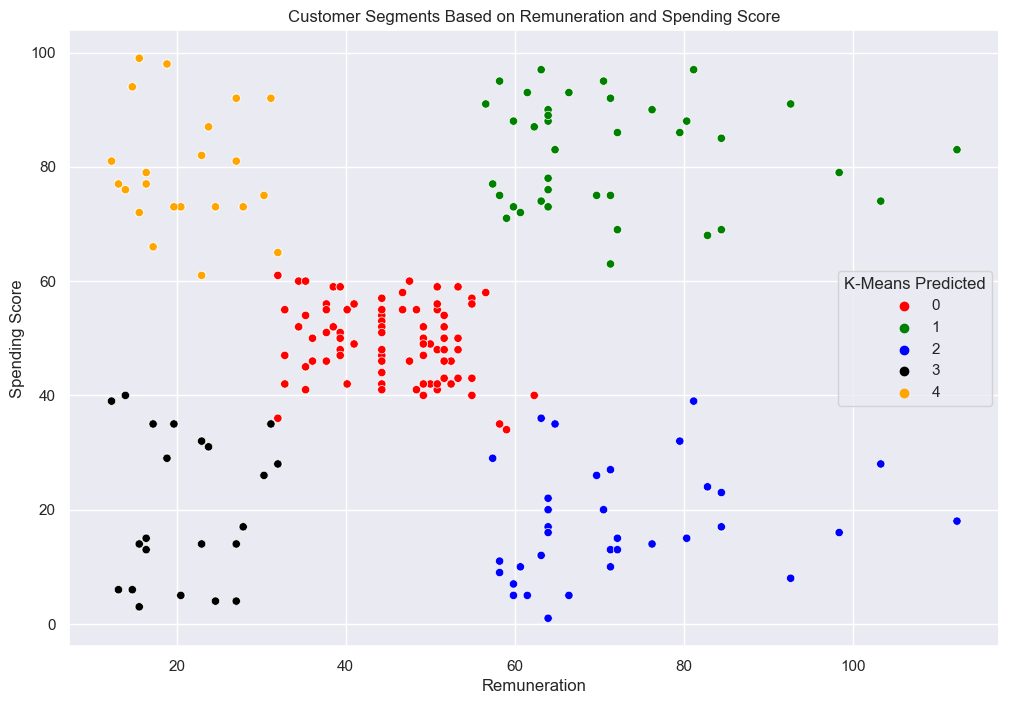

In [72]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

plt.title("Customer Segments Based on Remuneration and Spending Score")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

## 7. Discuss: Insights and observations

***Your observations here...***

There are 5 easily distinguishable groups 
(0) average income/average spend
(1) low income/low spend
(2) high income/low spend
(3) high income/high spend
(4) low income/ high spend.

There are this many people in each group.
0    774
1    356
2    330
3    271
4    269


By far the group with the highest population group 0 (average income/average spend) followed by group 1 (low income/low spend). Group 4 (low income/ high spend) has the lowest population of any group.


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [41]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import string

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [42]:
# Load the data set as df3.
df3 = pd.read_csv('reviews_clean.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [43]:
# Explore data set.
print(df3.shape)
print(df3.info)

(2000, 9)
<bound method DataFrame.info of       gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                    

In [44]:
df3.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [45]:
# Keep necessary columns. Drop unnecessary columns.
# Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 'remuneration',
                        'spending_score', 'loyalty_points',
                        'education', 'product'])

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [46]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [47]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [48]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [49]:
# View output.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [50]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('['+string.punctuation+']', '', regex=True)

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [51]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('['+string.punctuation+']', '', regex=True)

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [52]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates().reset_index(drop=True)

# View DataFrame.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars


## 3. Tokenise and create wordclouds

In [53]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()

# View DataFrame.
df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [54]:
# Apply tokenisation to both columns.
df4 = df4.applymap(word_tokenize)

# View DataFrame.
df4.head()

,review,summary
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [55]:
# Review: Create a word cloud.

# Join the words/tokens review to form a sentence
review_wordcloud_text = ' '.join([' '.join(words) for words in 
                                  df4['review'].tolist()])

# Create a WordCloud object
review_wordcloud = WordCloud(width=1600, height=900, 
                              background_color='white', stopwords=None, 
                              min_font_size=10).generate(review_wordcloud_text)


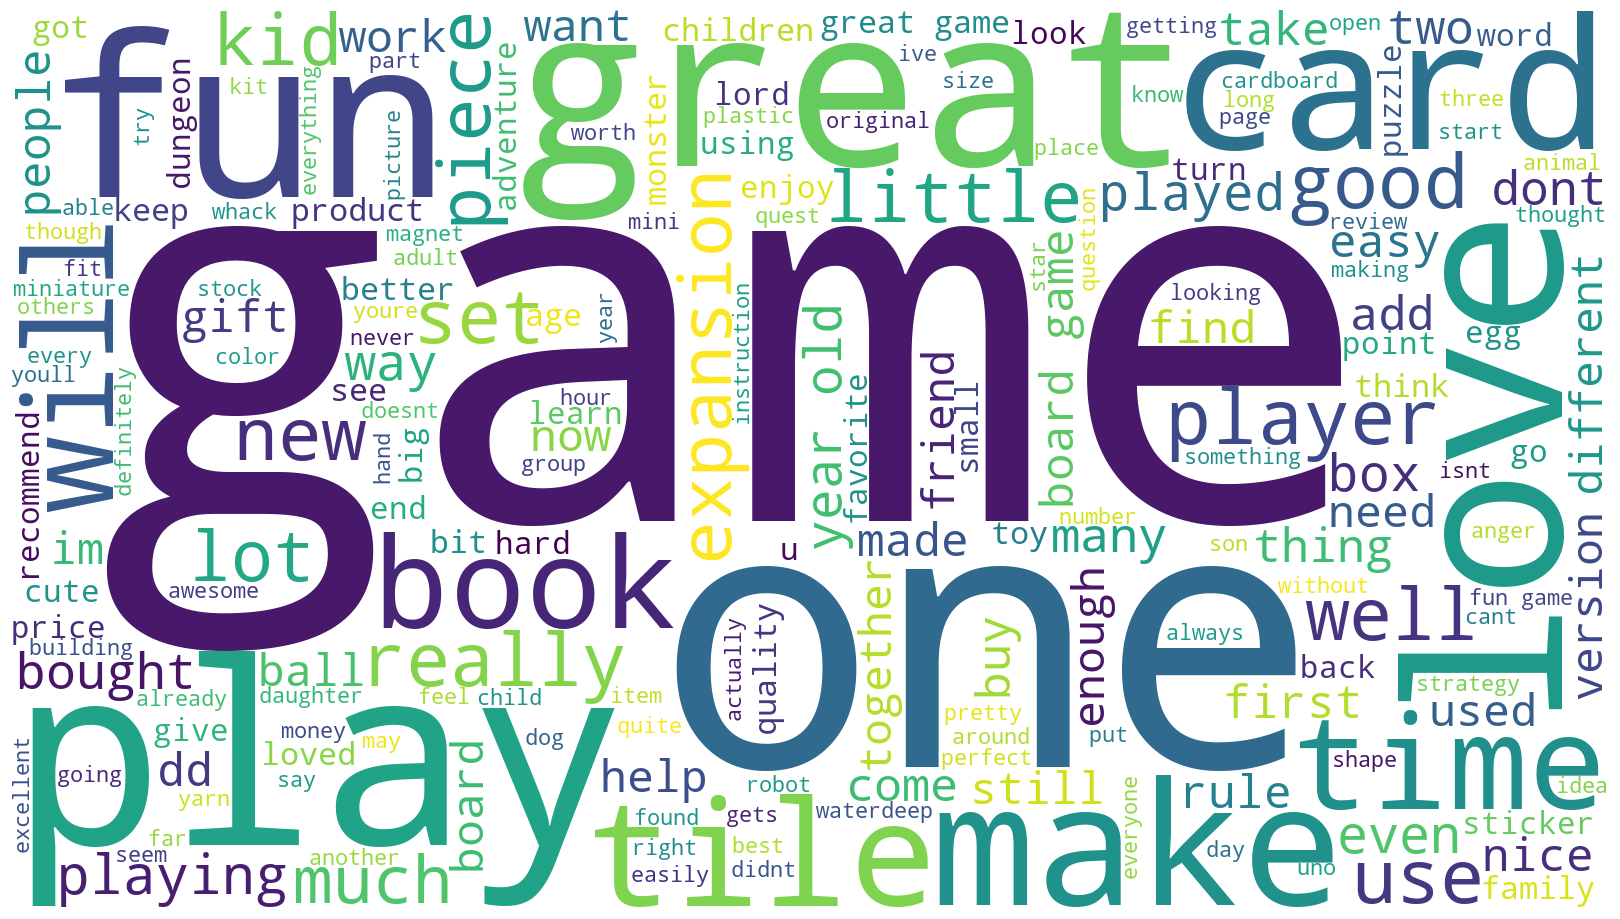

In [56]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [57]:
# Summary: Create a word cloud.

# Join the words/tokens review to form a sentence
summary_wordcloud_text = ' '.join([' '.join(words) for words in 
                                  df4['summary'].tolist()])

# Create a WordCloud object
summary_wordcloud = WordCloud(width=1600, height=900, 
                              background_color='white', stopwords=None, 
                              min_font_size=10).generate(summary_wordcloud_text)


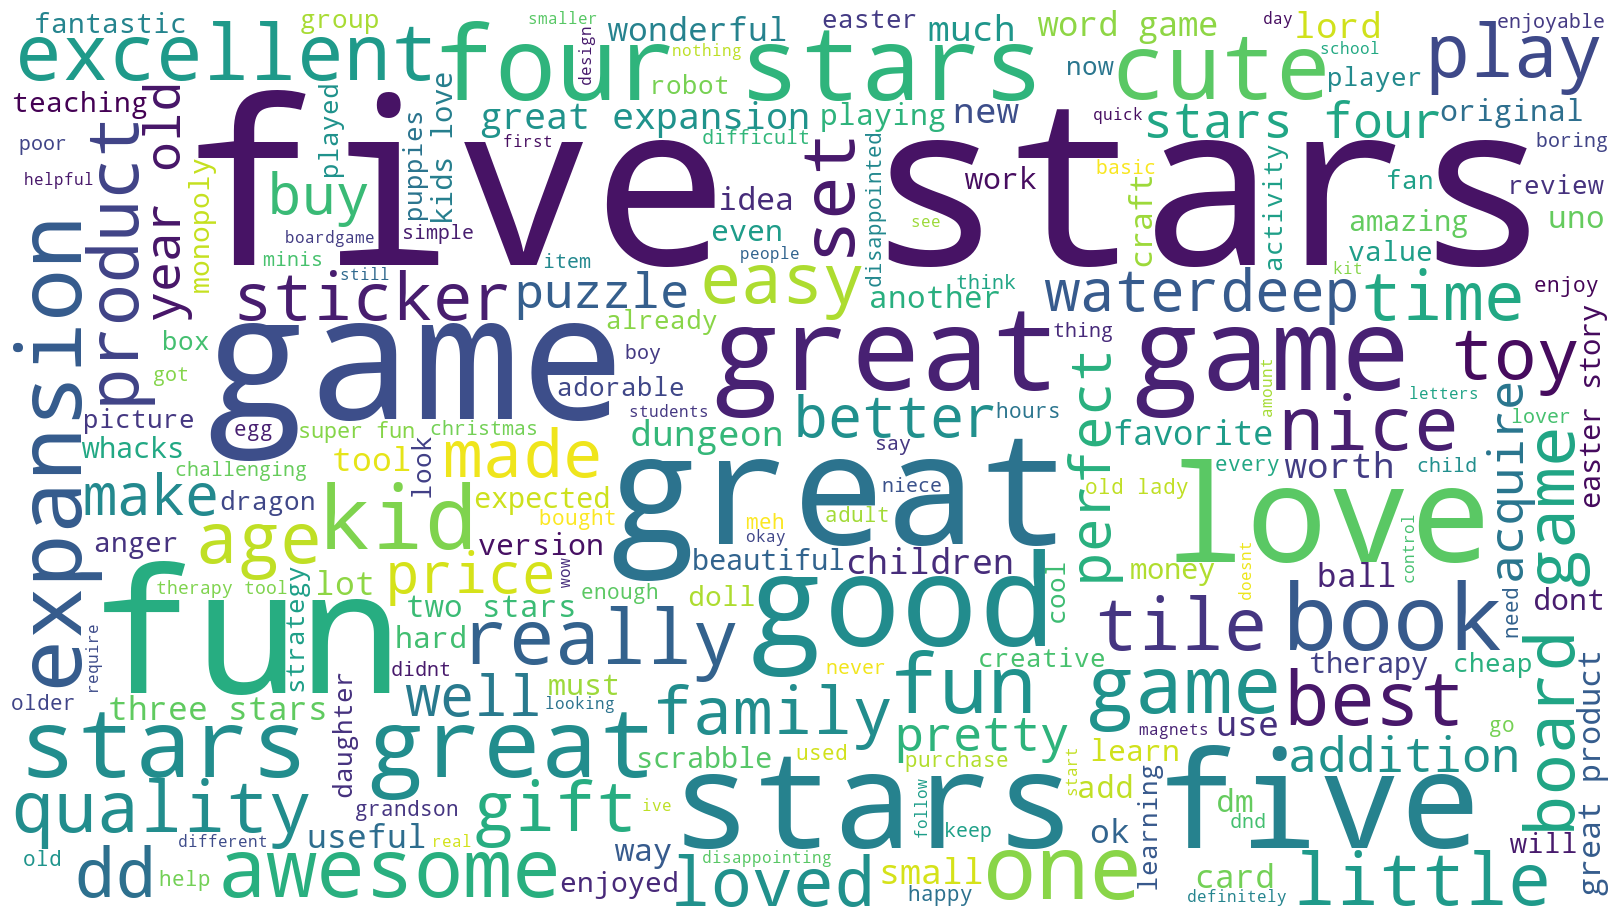

In [58]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [59]:
# Flatten the list of lists in both 'review' and 'summary' columns to a single list
all_tokens = [word for words_list in df4['review'].tolist() + df4['summary'].tolist() for word in words_list]

# Calculate frequency distribution
fdist = FreqDist(all_tokens)

# Preview the data
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [60]:
# Delete all the alpanum.
tokens = [word for words_list in df4['review'].tolist() + df4['summary'].tolist() for word in words_list if word.isalnum()]

In [61]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [62]:
# Create a wordcloud without stop words.
word_cloud = WordCloud(width=1600, height=900, background_color='white', stopwords=None, min_font_size=10).generate(tokens2_string)

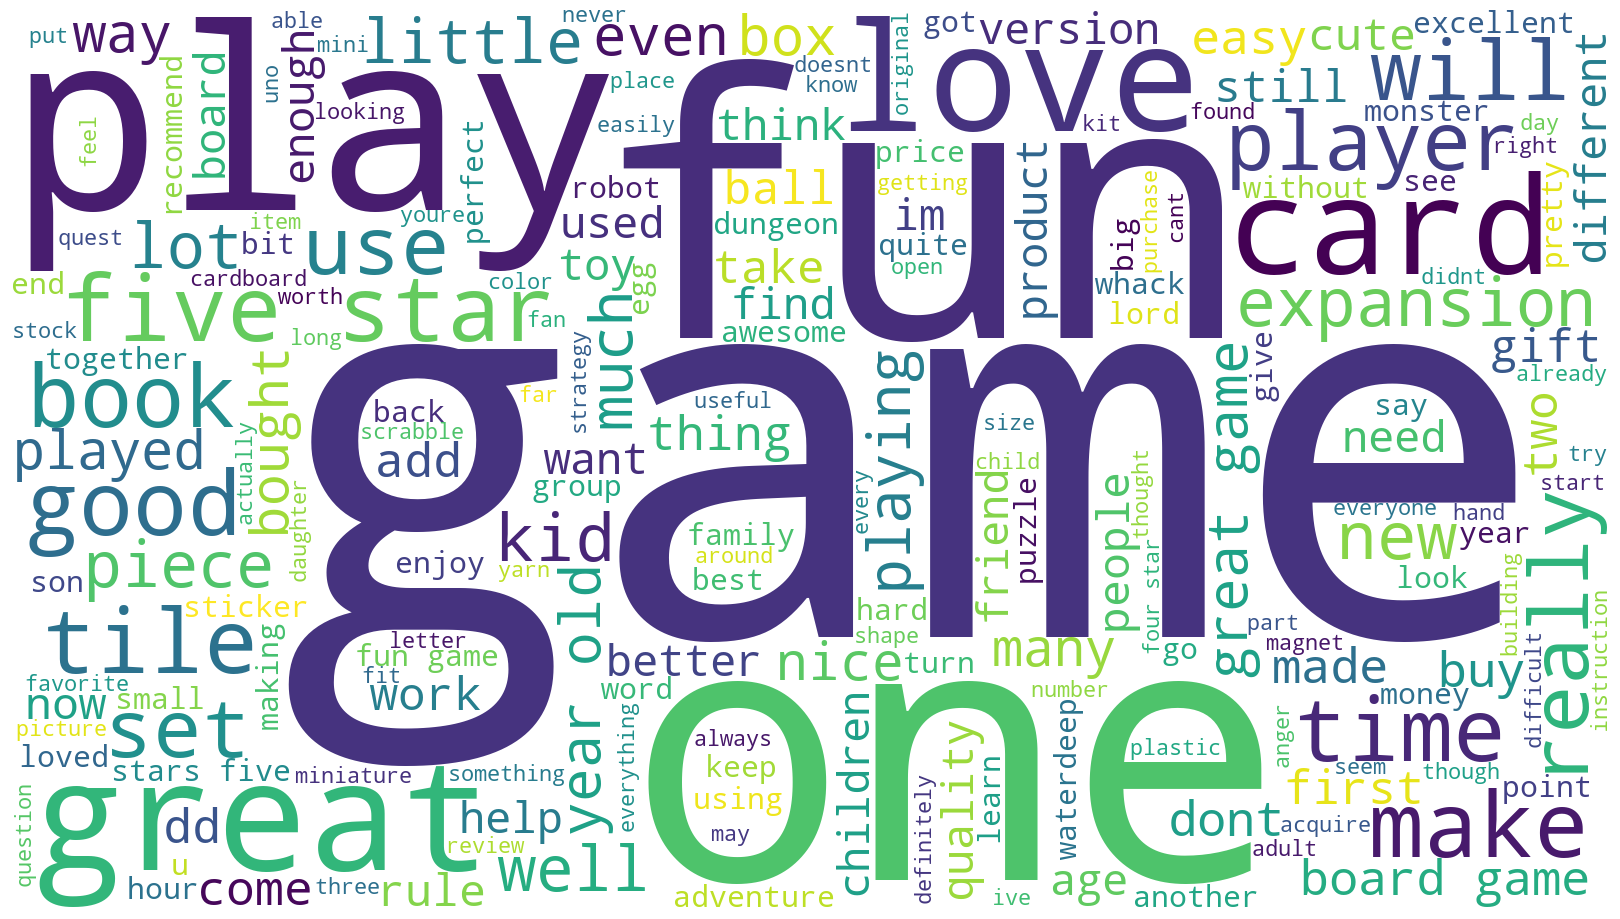

In [63]:
# Plot the wordcloud image.
plt.figure(figsize=(16, 9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [64]:
# Determine the 15 most common words.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview the data
counts

,Frequency
Word,
game,1990
great,875
fun,770
one,568
play,528
like,468
stars,464
love,416
good,381


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [65]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [66]:
# Define subjectivity score calculation
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [67]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
df3['review_polarity'] = df3['review'].apply(generate_polarity)
df3['review_subjectivity'] = df3['review'].apply(generate_subjectivity)
df3['summary_polarity'] = df3['summary'].apply(generate_polarity)
df3['summary_subjectivity'] = df3['summary'].apply(generate_subjectivity)

# View output.
print(df3['review_polarity'].head())
print(df3['review_subjectivity'].head())
print(df3['summary_polarity'].head())
print(df3['summary_subjectivity'].head())

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64
0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectivity, dtype: float64
0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64
0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64


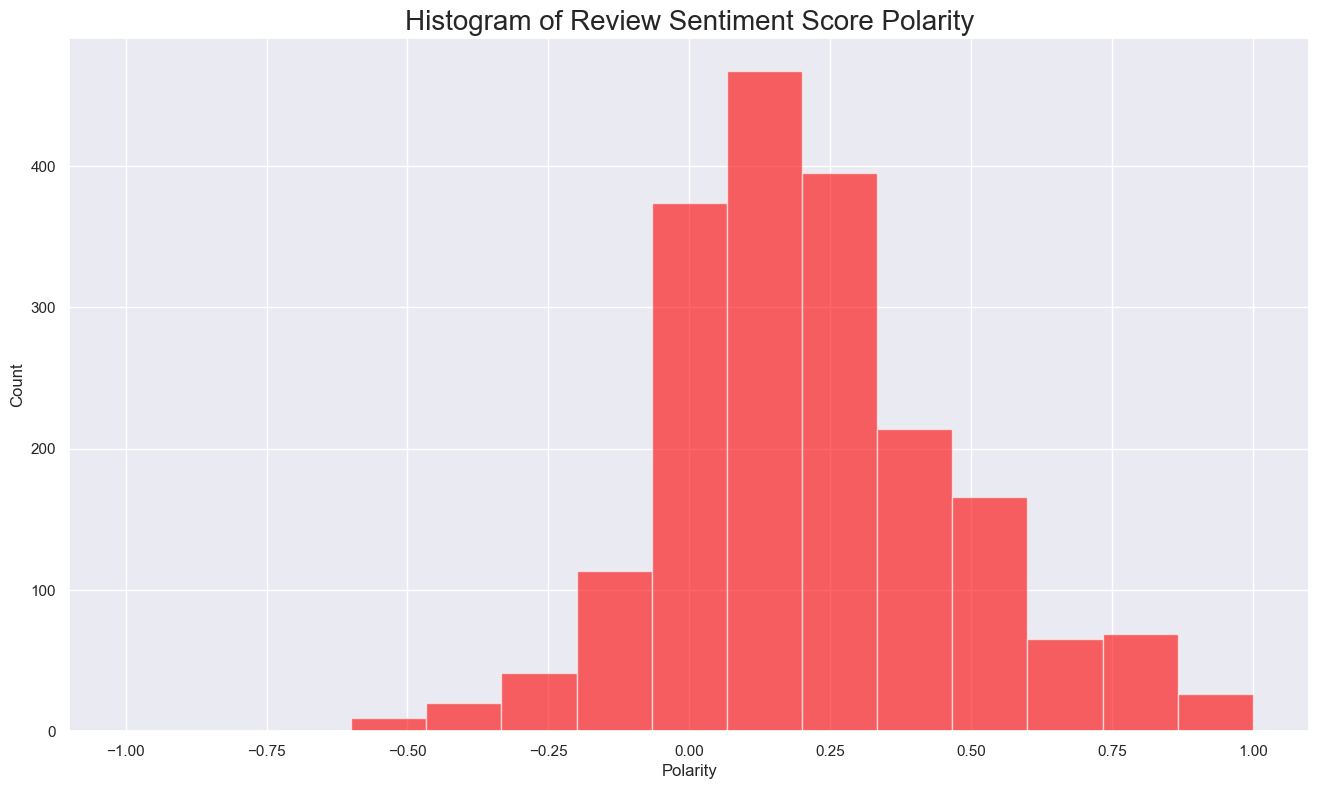

In [68]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['review_polarity'], 
                            num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Review Sentiment Score Polarity',
          fontsize=20)

plt.show()

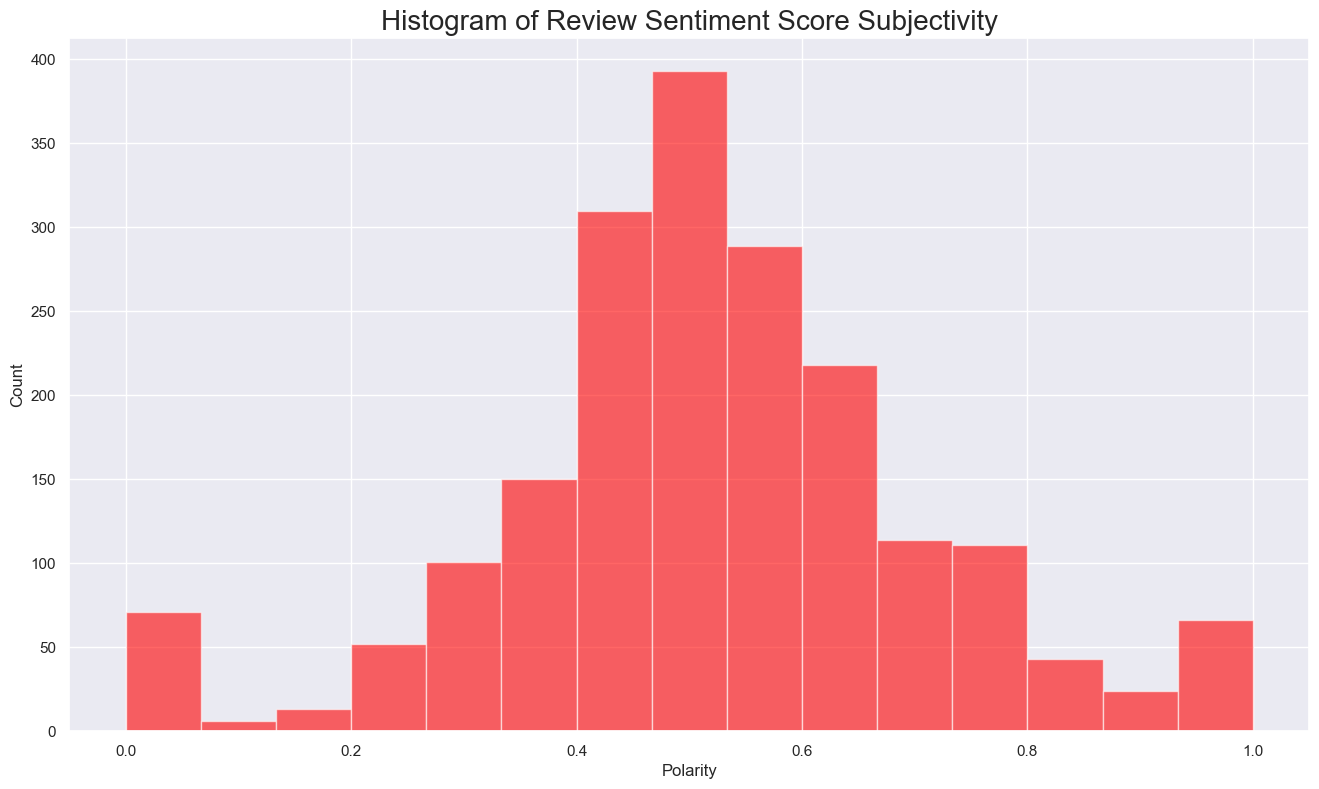

In [69]:
# Histogram of subjectivity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['review_subjectivity'], 
                            num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Review Sentiment Score Subjectivity', 
          fontsize=20)

plt.show()

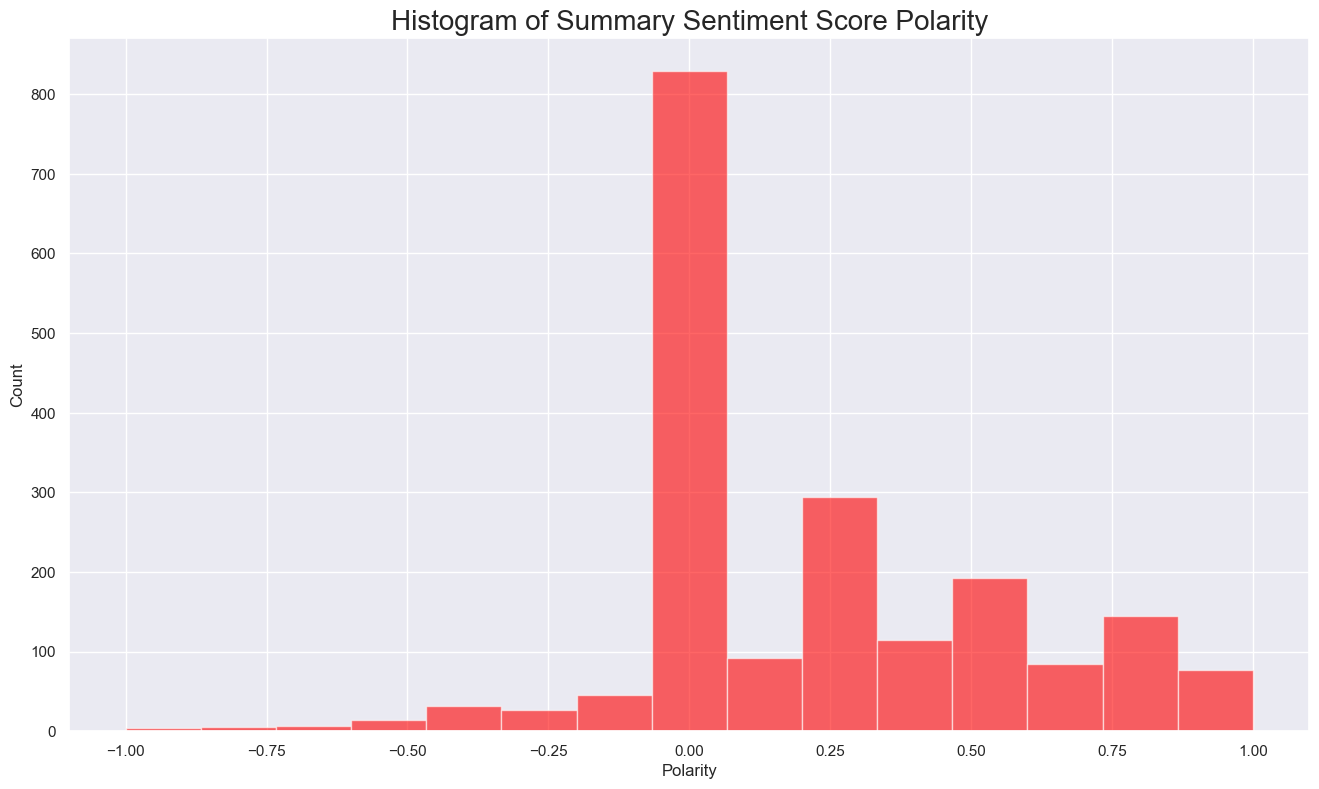

In [70]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['summary_polarity'], 
                            num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary Sentiment Score Polarity', 
          fontsize=20)

plt.show()

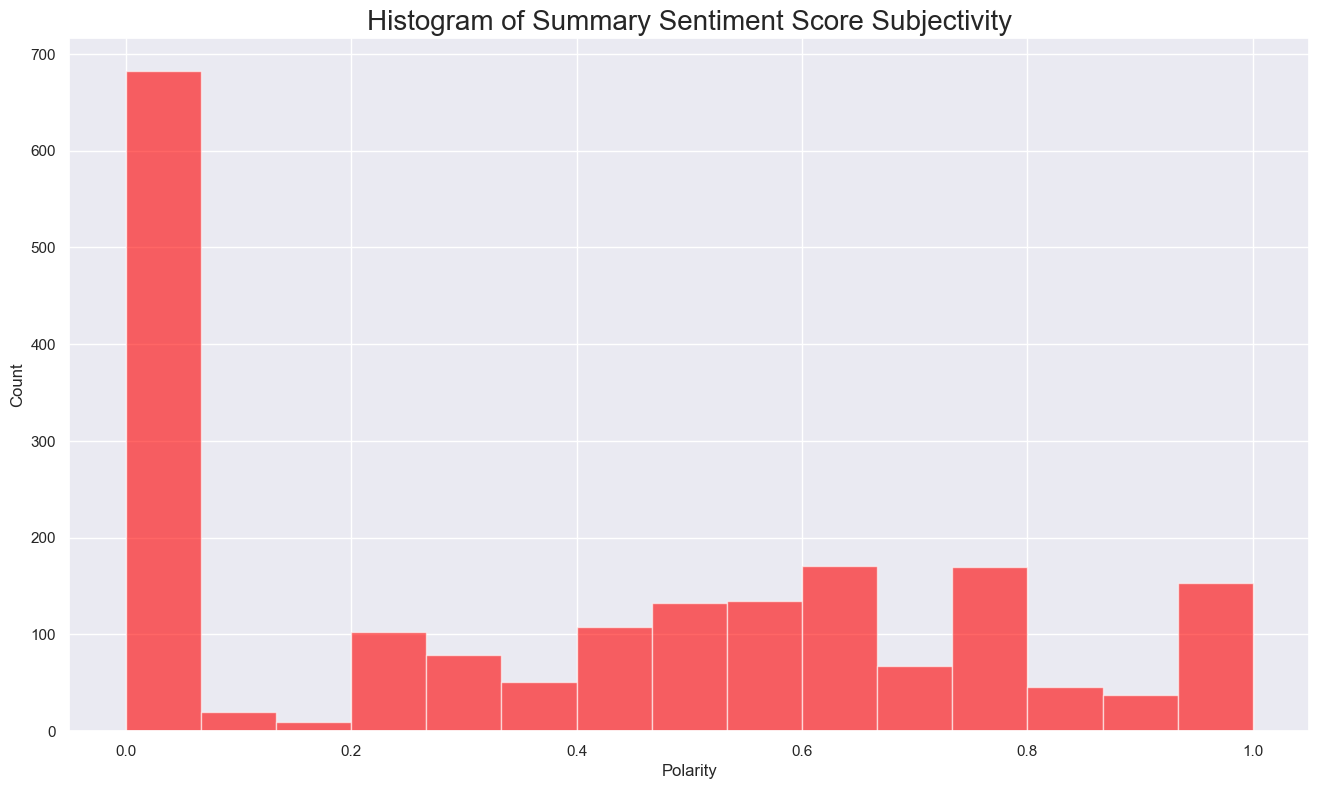

In [71]:
# Histogram of subjectivity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['summary_subjectivity'], 
                            num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary Sentiment Score Subjectivity', 
          fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [72]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment = df3.nsmallest(20, 'review_polarity')

# Eliminate the unnecesary columns
negative_sentiment = negative_sentiment[['review', 
                    'summary', 'review_polarity', 'review_subjectivity']]

# Adjust the column width + view output
negative_sentiment.style.set_properties(subset=['review'], 
                                        **{'width': '1200px'})

,review,summary,review_polarity,review_subjectivity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000
181,incomplete kit very disappointing,incomplete kit,-0.780000,0.910000
1773,im sorry i just find this product to be boring and to be frank juvenile,disappointing,-0.583333,0.750000
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,anger control game,-0.550000,0.300000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,stickers,-0.500000,0.900000
226,this was a gift for my daughter i found it difficult to use,two stars,-0.500000,1.000000
229,i found the directions difficult,three stars,-0.500000,1.000000
289,instructions are complicated to follow,two stars,-0.500000,1.000000
300,difficult,three stars,-0.500000,1.000000
1501,expensive for what you get,two stars,-0.500000,0.700000


In [73]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment = df3.nlargest(20, 'review_polarity')

# Eliminate the unnecesary columns
positive_sentiment = positive_sentiment[['review', 
                    'summary', 'review_polarity', 'review_subjectivity']]

# Adjust the column width + view the output
positive_sentiment.style.set_properties(subset=['review'], 
                                        **{'width': '1200px'})


,review,summary,review_polarity,review_subjectivity
7,came in perfect condition,five stars,1.000000,1.000000
164,awesome book,five stars,1.000000,1.000000
193,awesome gift,five stars,1.000000,1.000000
489,excellent activity for teaching selfmanagement skills,five stars,1.000000,1.000000
517,perfect just what i ordered,five stars,1.000000,1.000000
583,wonderful product,five stars,1.000000,1.000000
601,delightful product,five stars,1.000000,1.000000
613,wonderful for my grandson to learn the resurrection story,five stars,1.000000,1.000000
782,perfect,aquire game,1.000000,1.000000
923,awesome,five stars,1.000000,1.000000


In [74]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_summary = df3.nsmallest(20, 'summary_polarity')

# Eliminate the unnecesary columns
negative_summary = negative_summary[['review', 
                'summary', 'summary_polarity', 'summary_subjectivity']]

# Adjust the column width + view output
negative_summary.style.set_properties(subset=['summary'], 
                                      **{'width': '400px'})

,review,summary,summary_polarity,summary_subjectivity
21,these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your,the worst value ive ever seen,-1.000000,1.000000
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000
819,ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainly better with more people it can accommodate up to 6 and that may be too many ive never played with that number but with 3 or fewer it is too easy to run away with the game more players offers more competition and gaps between your turns and dilutes the available stock with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big payout ive enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isnt it this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items this helps open up story ideas and plot hooks,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
143,my kids grew up with a peg bench and hammer and loved it but i bought this brand for my grandson and was disappointed the pegs fit too loosely into the bench and he does not even use his hammer to pound them in as he can just push them in with his hand or sometimes they fall through automatically my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination etc when pounding them in the pegs are nice and thick for little hands but just not snug enough fitting to really use the toy as it is intended,disappointed,-0.750000,0.750000
623,eggs split and were unusable,disappointed,-0.750000,0.750000
785,my mom already owned an acquire game but she always commented on how poorly it was made so i thought i would get her a new one for christmas the quality of this one was not much better her old one had cards f

In [75]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_summary = df3.nlargest(20, 'summary_polarity')

# Eliminate the unnecesary columns
positive_summary = positive_summary[['review', 
                'summary', 'summary_polarity', 'summary_subjectivity']]

# Adjust the column width + view output
positive_summary.style.set_properties(subset=['summary'], 
                                      **{'width': '400px'})

,review,summary,summary_polarity,summary_subjectivity
6,i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,best gm screen ever,1.000000,0.300000
28,these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity,wonderful designs,1.000000,1.000000
32,awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these,perfect,1.000000,1.000000
80,my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
133,this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler,perfect for preschooler,1.000000,1.000000
139,i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it,awesome sticker activity for the price,1.000000,1.000000
160,my 8 year old son loves this drawing book loves it,awesome book,1.000000,1.000000
162,this was a christmas present for a nephew who loves to draw and he loves superheroes he was very happy with his gift,he was very happy with his gift,1.000000,1.000000
186,great product took a little practice and time but after you get the hang of it it turns into a cute cuddly little friend mine didnt turn out exactly like the picture but it adds a taste of your own sense of style they are super cute and comes with everything it says it will,awesome,1.000000,1.000000
209,i was skeptical but my 9 year old has had so much fun with this kit and it was her favorite christmas present she pretty much made the puppies herself with minimal help from me though i did hot glue some ears rather than use the included glue only downside is the cuttings can be messy but really wonderful instructions wellmade supplies and can be used for many yearsand maybe even making different animals if you are creative highly recommend for artsy determined 9 year olds i actually want to try to make one myself they are so darn cute,awesome and welldesigned for 9 year olds,1.000000,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

# 